
## **1) Importação de Bibliotecas Necessárias**


In [ ]:
import numpy as np # Pacote para computação científica permitindo manipulação matricial, operações algébricas e estatísticas vetorizadas (https://www.numpy.org/)
import scipy as sp # Pacote dependente do NumPy voltado para estatística, otimização, álgebra linear, transformações de Fourier, processamento de sinais (https://scipy.org/scipylib/)
import pandas as pd # Pacote para análise e manipulação flexível de dados com estruturas similares aos Data Frames da linguagem R (https://pandas.pydata.org/)
import matplotlib.pyplot as plt # Pacote para visualização de dados gerando uma infinidade de diagramas e gráficos (https://matplotlib.org/)
import seaborn as sns # Biblioteca de visualização baseada no Matplotlib para gerar gráficos estatísticos mais atraentes (https://seaborn.pydata.org).
import plotly.express as px # Biblioteca para gerar visualizações mais sofisticadas que o Matplotlib (https://plotly.com/).
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
from google.colab import drive
from numpy import savetxt
import os
import os.path
import cv2 # OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library (https://opencv.org/)
from PIL import Image

## **2.1.) Pré-processamento das Imagens (Banco de Dados de Vegetais)**

Geração do *ground-truth* a partir de máscaras (*labels*) produzidas no *Software LabelMe*


In [ ]:
# ------------------------------------------------------------------------------
# Open files from Google Drive - Runs on credentials and any Google user 
# ------------------------------------------------------------------------------
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
driveG = GoogleDrive(gauth)

idImages = [
    '1l093oeLmBMni4fJ119kkg8TfZar6xdvE', 
    '1E740G_wO-joWlG7f6aZ95NpCBgDQfp1I', 
    '1vVyaWhh8ltcVfJXaHYy0LYT2urF3CgYK',
    '1XJwChtTtzO8bFUq0QlW1J5Z6AL8dpFCB',
    '1C1Bh2kYhe9OOLINnr9bvd7b7l6t6muwi',
    '19qR79eAwtD3s74uTolvE68dalLdhVWev',
    '13UDc3ZrHh4oyJ9IbWGFsTkcVTO7Xr51i',
    '1S1mlNLwBLU07VIvTaUo_tjHbZteW0-nQ',
    '1N0cr7hEODnvzYPPGHFoXsEmwkb9up1xB',
    '1VNpVhKLDVnYN5kYDnVIDaYW11q3fvDBY',
    '1Ce49gaJsGCYAub2C9SG9UcTYu0ZEsXoP',
    '1AFU-1KQl-3YOtJLLwsVL_b_aSw8LNvBp',
    '1QYNsGv-xxLuQRPoISMhfvWj7taryTLdT',
    '1QTkXKE1ZePV4yWW5NgYOUB55032PkaUG',
    '1OU84JGEOBR_DNchJ-XtrtLaTrusAiQjn',
    '1qwrmYNb7MuISqfP9zPP1ehTD04lVDqeX',
    '1RSIywq2RbIqH53z6DoWGznbc_oCiFw-y',
    '1u24CUGIJGJpWgLA0Iozp8LVs8XhWChBd',
    '1c0jt59b4fSo4CTUDdbaHgWboVYpIf49T',
    '19GnsItVNjRb3ozq67KMmnVjLLeAXa7gU',
    '1LsBMQZYPWNWzH-AfYukLIUo7W5Bw8ov1'
    ]

nameImg = ['01','02','03','04','05','06','07','08','09',
           '10','11','12','13','14','15','16','17','18','19','20','21']
i = 0
for idImg in idImages:
    n = nameImg[i] + '.png'
    downloaded = driveG.CreateFile({'id':idImg})
    downloaded.GetContentFile(n)
    #img1 = cv2.imread('img1.png')
    im = Image.open(n)
    img1 = np.array(im)
    if (((i%2) == 0) & (i != 20)):
        img1[img1 == 1] = 2
        #np.where(im==1, 2, im)
    #img1 = img1[:,:,0]
    save_file = 1
    if (save_file == 1):
        #drive.mount('drive')
        im = Image.fromarray(img1)
        im.save(n)
        ni = n
        !cp "$ni" "/content/drive/MyDrive/MyFiles/PROJECTS/2020-Ahead-Synergia/Codes/col-object-detection/data/vegetais/annotations"
        #!cp nameImg[0] + '.png' "drive/My Drive/MyFiles/PROJECTS/2020-Ahead-Synergia/Codes/col-object-detection/annotations"
        #np.savetxt('img1.csv', img1, delimiter=',', fmt='%i')
        #!cp img1.csv "drive/My Drive/MyFiles/PROJECTS/2020-Ahead-Synergia/Codes/col-object-detection/annotations"
    i = i + 1

## **2.1.) Pré-processamento das Imagens (Banco de Dados para Tipificação da Peça de Cana)**

Geração do *ground-truth* a partir de máscaras (*labels*) produzidas no *Software LabelMe*

In [ ]:
# ------------------------------------------------------------------------------
# Open files from Google Drive - Runs on credentials and any Google user 
# ------------------------------------------------------------------------------
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
driveG = GoogleDrive(gauth)

idImages = [
    '1l093oeLmBMni4fJ119kkg8TfZar6xdvE', 
    '1E740G_wO-joWlG7f6aZ95NpCBgDQfp1I', 
    '1vVyaWhh8ltcVfJXaHYy0LYT2urF3CgYK',
    '1XJwChtTtzO8bFUq0QlW1J5Z6AL8dpFCB',
    '1C1Bh2kYhe9OOLINnr9bvd7b7l6t6muwi',
    '19qR79eAwtD3s74uTolvE68dalLdhVWev',
    '13UDc3ZrHh4oyJ9IbWGFsTkcVTO7Xr51i',
    '1S1mlNLwBLU07VIvTaUo_tjHbZteW0-nQ',
    '1N0cr7hEODnvzYPPGHFoXsEmwkb9up1xB',
    '1VNpVhKLDVnYN5kYDnVIDaYW11q3fvDBY',
    '1Ce49gaJsGCYAub2C9SG9UcTYu0ZEsXoP',
    '1AFU-1KQl-3YOtJLLwsVL_b_aSw8LNvBp',
    '1QYNsGv-xxLuQRPoISMhfvWj7taryTLdT',
    '1QTkXKE1ZePV4yWW5NgYOUB55032PkaUG',
    '1OU84JGEOBR_DNchJ-XtrtLaTrusAiQjn',
    '1qwrmYNb7MuISqfP9zPP1ehTD04lVDqeX',
    '1RSIywq2RbIqH53z6DoWGznbc_oCiFw-y',
    '1u24CUGIJGJpWgLA0Iozp8LVs8XhWChBd',
    '1c0jt59b4fSo4CTUDdbaHgWboVYpIf49T',
    '19GnsItVNjRb3ozq67KMmnVjLLeAXa7gU',
    '1LsBMQZYPWNWzH-AfYukLIUo7W5Bw8ov1'
    ]

nameImg = [121,111,101,75,65,55,31,21,11,61,51,41,124,84,144,134,114,104,94,74,64,54,44,34,24,14,125,115,105,95,85,45,35,25,15,91,81,71]
i = 0
for idImg in idImages:
    n = str(nameImg[i]) + '.png'
    downloaded = driveG.CreateFile({'id':idImg})
    downloaded.GetContentFile(n)
    #img1 = cv2.imread('img1.png')
    im = Image.open(n)
    img1 = np.array(im) 
    if (((i%2) == 0) & (i != 20)):
        img1[img1 == 1] = 2
        #np.where(im==1, 2, im)
    #img1 = img1[:,:,0]
    save_file = 1
    if (save_file == 1):
        #drive.mount('drive')
        im = Image.fromarray(img1)
        im.save(n)
        ni = n
        !cp "$ni" "/content/drive/MyDrive/MyFiles/PROJECTS/2020-Ahead-Synergia/Codes/col-object-detection/data/vegetais/annotations"
        #!cp nameImg[0] + '.png' "drive/My Drive/MyFiles/PROJECTS/2020-Ahead-Synergia/Codes/col-object-detection/annotations"
        #np.savetxt('img1.csv', img1, delimiter=',', fmt='%i')
        #!cp img1.csv "drive/My Drive/MyFiles/PROJECTS/2020-Ahead-Synergia/Codes/col-object-detection/annotations"
    i = i + 1


In [ ]:
#! pip install git+https://github.com/divamgupta/image-segmentation-keras
! pip install git+https://github.com/luizfsc/col-semseg


  Cloning https://github.com/luizfsc/col-semseg to /tmp/pip-req-build-xz0ap1l1
  Running command git clone -q https://github.com/luizfsc/col-semseg /tmp/pip-req-build-xz0ap1l1
     |████████████████████████████████| 3.3MB 8.1MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp37-none-any.whl size=29672 sha256=0118a4947c71d3c722a485c18653881ad04e37ce503dd373b9653ecc792eb995
  Stored in directory: /tmp/pip-ephem-wheel-cache-i5ye6jzg/wheels/17/3c/ea/00e422eb110abef94b49590420e74188291325223269f6128d
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


### Download the dataset

In [ ]:
#! wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip dataset1.zip
#! wget https://github.com/luizfsc/datasets/raw/master/dataset_weeds.zip && unzip dataset_weeds.zip
#! wget https://github.com/luizfsc/datasets/raw/master/dataset_toletes_320x640.zip && unzip dataset_toletes_320x640.zip
#! wget https://github.com/luizfsc/datasets/raw/master/dataset_vegetable.zip && unzip dataset_vegetable.zip

! wget https://github.com/luizfsc/datasets/raw/master/dataset_tipificacao_v1_p1.zip && unzip dataset_tipificacao_v1_p1.zip
! wget https://github.com/luizfsc/datasets/raw/master/dataset_tipificacao_v1_p2.zip && unzip dataset_tipificacao_v1_p2.zip
! wget https://github.com/luizfsc/datasets/raw/master/dataset_tipificacao_v1_p3.zip && unzip dataset_tipificacao_v1_p3.zip
! wget https://github.com/luizfsc/datasets/raw/master/dataset_tipificacao_v1_p4.zip && unzip dataset_tipificacao_v1_p4.zip


--2021-03-02 17:32:20--  https://github.com/luizfsc/datasets/raw/master/dataset_tipificacao_v1_p1.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luizfsc/datasets/master/dataset_tipificacao_v1_p1.zip [following]
--2021-03-02 17:32:20--  https://raw.githubusercontent.com/luizfsc/datasets/master/dataset_tipificacao_v1_p1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24861428 (24M) [application/zip]
Saving to: ‘dataset_tipificacao_v1_p1.zip’

dataset_tipificacao 100%[===================>]  23.71M  91.9MB/s    in 0.3s    

2021-03-02 17:32:21 (91.9 MB/s) - ‘dataset_tipificacao_v1_p1.zi

### Initialize the model

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=50 ,  input_height=768, input_width=960  )
# model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )
# model = vgg_unet(n_classes=50 ,  input_height=720, input_width=640  )


58892288/58889256 [==============================] - 1s 0us/step


### Train the model

In [ ]:
model.train(
    #train_images =  "dataset1/images_prepped_train/",
    #train_images =  "dataset_weeds/images_prepped_train/",
    #train_images =  "dataset_toletes_320x640/images_prepped_train/",
    #train_images =  "dataset_vegetable/images_train/",
    train_images =  "dataset_tipificacao_v1/images_train/",
    #train_annotations = "dataset1/annotations_prepped_train/",
    #train_annotations = "dataset_weeds/annotations_prepped_train/",
    #train_annotations = "dataset_toletes_320x640/annotations_prepped_train/",
    #train_annotations = "dataset_vegetable/annotations_train/",
    train_annotations = "dataset_tipificacao_v1/annotations_train/",
    checkpoints_path = "/tmp/vgg_unet_1", epochs=5)

 12%|█▎        | 4/32 [00:00<00:00, 34.46it/s]

Verifying training dataset


100%|██████████| 32/32 [00:00<00:00, 40.95it/s]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Dataset verified! 
Epoch 1/5
512/512 [==============================] - 353s 664ms/step - loss: 1.1982 - accuracy: 0.7604
saved  /tmp/vgg_unet_1.0
Epoch 2/5
512/512 [==============================] - 344s 671ms/step - loss: 0.2914 - accuracy: 0.8870
saved  /tmp/vgg_unet_1.1
Epoch 3/5
512/512 [==============================] - 343s 670ms/step - loss: 0.1792 - accuracy: 0.9363
saved  /tmp/vgg_unet_1.2
Epoch 4/5
512/512 [==============================] - 343s 670ms/step - loss: 0.0690 - accuracy: 0.9772
saved  /tmp/vgg_unet_1.3
Epoch 5/5
512/512 [==============================] - 343s 670ms/step - loss: 0.0275 - accuracy: 0.9902
saved  /tmp/vgg_unet_1.4


IoU per class: [8.737e-01 3.000e-04 0.000e+00 0.000e+00]
Mean IoU: 0.2185


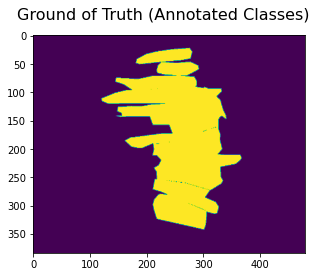

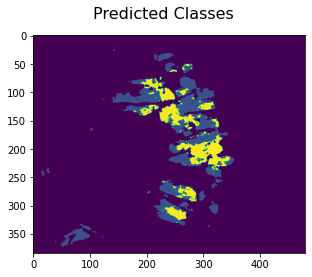

In [ ]:
#### Using Intersection over Union (IoU) measure for each class
#### Average IoU is equal to TP/(FN + TP + FP)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
from keras_segmentation.metrics import get_iou
import numpy as np

#test_img = "dataset_vegetable/images_test/21.png"
#test_gt = "dataset_vegetable/annotations_test/21.png"
test_img = "dataset_tipificacao_v1/images_test/144.png"
test_gt = "dataset_tipificacao_v1/annotations_test/144.png"
#test_img = "dataset_weeds/images_prepped_test/75.png"
#test_gt = "dataset_weeds/annotations_prepped_test/75.png"
#test_img = "dataset_toletes_320x640/images_prepped_test/IMG_0805.png"
#test_gt = "dataset_toletes_320x640/annotations_prepped_test/IMG_0805.png"
num_classes = 4

out = model.predict_segmentation(
    #inp="dataset1/images_prepped_test/0016E5_08007.png",
    inp=test_img,
    out_fname="/tmp/out.png"
)

gt = cv2.imread(test_gt, 0)
#gt = cv2.resize(gt,(320,160))
#gt = cv2.resize(gt,(512,384))
gt = cv2.resize(gt,(480,384))
#print(gt.shape)

fig = plt.figure()
fig.suptitle('Ground of Truth (Annotated Classes)', fontsize=16)
#f, axarr = plt.subplots(2,1)
#axarr[0].imshow(img)
#axarr[1].imshow(out)
plt.imshow(gt)
fig = plt.figure()
fig.suptitle('Predicted Classes', fontsize=16)
plt.imshow(out)
#print(out.shape)

### https://fairyonice.github.io/Learn-about-Fully-Convolutional-Networks-for-semantic-segmentation.html
iou = get_iou(gt, out, num_classes)

mean_iou = sum(iou)/num_classes

print("IoU per class:", np.round(iou, 4))

print("Mean IoU:", round(mean_iou, 4))


In [ ]:
import random
DATA_LOADER_SEED = 0
random.seed(DATA_LOADER_SEED)

cc = [(random.randint(0, 255), random.randint(
    0, 255), random.randint(0, 255)) for _ in range(5000)]

cc[0] = (200, 130, 0) #(197, 215, 20)  # OTHERS
cc[1] = (50, 210, 80) #(132, 248, 207) # CORN
cc[2] = (0, 220, 220) #(155, 244, 183) # GROUND
cc[3] = (50, 80, 210) #(111, 71, 144)  # WEED

o = model.predict_segmentation(
    #inp="dataset1/images_prepped_test/0016E5_08007.png",
    #inp="dataset_weeds/images_prepped_test/75.png",
    inp="dataset_tipificacao_v1/images_test/144.png"
    #inp="dataset_vegetable/images_test/21.png",
    #inp="dataset_toletes_320x640/images_prepped_test/IMG_0805.png",
    out_fname="/tmp/out.png", overlay_img=True, show_legends=True, colors = cc,
    #class_names = ["Sky","Building","Pole","Road","Pavement","Tree","SignSymbol","Fence", "Car","Pedestrian","Bicyclist"]
    class_names = ["Others","Corn","Ground","Weed"]

)

from IPython.display import Image
Image('/tmp/out.png')

SyntaxError: ignored